# Predicting Water Pump Faults in Tanzania

## Business Understanding

Ensuring access to clean and reliable water sources is critical for public health, economic development, and communities' overall well-being. However, in Tanzania, access to clean and reliable water remains a major socio-economic challenge. According to a World Bank report on universal access to water and sanitation in 2023, 39% (24 million) of the population in the country suffers from acute water shortage throughout the year. This leads to water-related preventable deaths and diseases, costing the Tanzanian economy more than $2.4 billion each year in excess medical costs and lost productivity. These are resources that could have been channeled towards much-needed development. It is estimated that providing adequate water through optimizing the current water supply will significantly reduce economic losses and generate savings that would facilitate more spending towards development.

### Business Problem

Tanzania's water supply system is characterized by frequent water pump breakdowns resulting from lack of proper maintenance and inefficient management. This leads to disruptions in water supply, exacerbating the acute shortage of clean water and subsequent socio-economic losses.

The government of Tanzania, in collaboration with NGOs and partner organizations, aims to enhance access to clean water by improving the maintenance and functionality of water wells across the country. To achieve this, water point sustainability risk levels across the supply system need to be projected by learning from current point profiles to guide stakeholders' decisions through highlighting:

- Most dilapidated wells that should be prioritized for maintenance, repairs, or rehabilitation.
- Sites to be earmarked for future wells.
- Data-driven recommendations that are responsive to stakeholders' needs and actionable guide improve management practices and water accessibility.

### Stakeholders

- Government of Tanzania: Interested in optimizing resources for maintaining and repairing water wells to ensure clean water access for citizens.
- NGOs focusing on clean water access: Seeking to identify and prioritize wells in need of repair to efficiently allocate resources and interventions.
- Private sector partners: Potentially interested in investing in water infrastructure projects aligned with corporate social responsibility initiatives or in collaboration with NGOs and governmental organizations.

## Objective

The objective of this project is to predict the operational/functionality status of water pumps based on various features related to the pumps' installation. Specifically, the project will:

- Evaluate factors that affect the functionality of a pump.
- Identify and model combinations of features that best predict the functionality of a water pump.
- Test and validate the accuracy of the model.
- Draw conclusions and recommendations.

## Data Understanding

The dataset for this project was obtained from [www.drivendata.org](www.drivendata.org) titled “Pump it Up: Data Mining the Water Table” in 2015. It is divided into three CSV files: a training set containing 59,400 observations (80%) and a test set containing 14,850 observations (20%). The third dataset contains training set labels that detail status group information for each of the training set values indicating whether the pump is “functional”, “non-functional”, or “in need of repairs”. Both the train and test datasets have 40 similar columns with information about water pumps in Tanzania, including various attributes such as pump location, construction details, management, payment details, and water quality.

### Key Columns Include:

- id: Unique identifier for each water pump
- amount_tsh: Total static head (amount of water available to pump)
- date_recorded: Date the pump data was recorded
- funder: Organization or individual that funded the pump installation
- gps_height: Altitude of the pump location
- installer: Organization or individual that installed the pump
- longitude: Geographic longitude coordinate of the pump location
- latitude: Geographic latitude coordinate of the pump location
- wpt_name: Name of the waterpoint (e.g., name of the well)
- num_private: Number of private plots reserved for the waterpoint
- population: Population catchment served by the well
- construction_year: Year the pump was installed
- basin: Geographic basin of the pump location
- subvillage: Geographic location of the well within the village
- region: Geographic region of the pump location
- region_code: Code representing the geographic region
- district_code: Numeric code for the administrative district
- lga: Local Government Area
- ward: Administrative division within a district
- public_meeting: Indicator of whether there was a public meeting about the well
- recorded_by: Name of the person who entered the well into the database
- scheme_management: Management of the water scheme (e.g., water board)
- scheme_name: Name of the water scheme
- permit: Indicator of whether the waterpoint is permitted
- extraction_type: Method used to extract water from the well
- extraction_type_group: Grouped extraction type
- extraction_type_class: Class of extraction type
- management: Type of management for the pump
- management_group: Grouped management type
- payment: Payment type for water service
- payment_type: Type of payment
- water_quality: Quality of water provided by the pump


### DATA PREPARATION.
#### Importing Necessary Libraries,Loading and Inspecting Datasets.

To perform data exploration, preprocessing, and predictive modeling, several python libraries need to be imported.

In [1]:
#importrelevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer


### Loading the dataset

## Exploring CSV Datasets

This function is designed to import three CSV files (`training_set_values.csv`, `test_set_values.csv`, and `training_set_labels.csv`), explore their structure, and display the first few rows of each dataset.

### Importing CSV Files
The function first imports the CSV files using the `pd.read_csv()` function from the Pandas library. Three DataFrames are created:
- `training_set_values`: Contains training data values.
- `test_set_values`: Contains test data values.
- `training_set_labels`: Contains labels for the training data.

### Exploring Dataset Structure
The function defines a nested function `explore_structure()` to explore the structure of each dataset. This function utilizes the `.info()` method of Pandas DataFrame to display a concise summary of the dataset including column names, data types, and non-null counts.

### Exploring First Few Rows
Another nested function `explore_first_few_rows()` is defined to display the first few rows of each dataset using the `.head()` method of Pandas DataFrame. This provides a preview of the data contained in each dataset.

### Calling the Function
Finally, the function is called using `explore_datasets()`, which executes all the steps described above, effectively importing the CSV files, exploring their structure, and displaying the first few rows of each dataset.

This markdown provides a clear explanation of the Python function's purpose and functionality.

In [67]:
# Loading the csv files
training_set_values = pd.read_csv("training_set_values.csv")
test_set_values = pd.read_csv("test_set_values.csv")
training_set_labels = pd.read_csv("training_set_labels.csv")


In [68]:
import pandas as pd

def explore_datasets():
    # Importing the csv files
    training_set_values = pd.read_csv("training_set_values.csv")
    test_set_values = pd.read_csv("test_set_values.csv")
    training_set_labels = pd.read_csv("training_set_labels.csv")
    
    # Explore the structure of datasets
    def explore_structure(data, name):
        print(f"Structure of {name}:")
        print(data.info())
        print("\n")

    explore_structure(training_set_values, "training_set_values")
    explore_structure(test_set_values, "test_set_values")
    explore_structure(training_set_labels, "training_set_labels")
    
    # Explore the first few rows of the datasets
    def explore_first_few_rows(data, name):
        print(f"First few rows of {name}:")
        print(data.head())
        print("\n")

    explore_first_few_rows(training_set_values, "training_set_values")
    explore_first_few_rows(test_set_values, "test_set_values")
    explore_first_few_rows(training_set_labels, "training_set_labels")

   # Call the function to output the desired information
explore_datasets()


Structure of training_set_values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code       

## Exploring Distribution of Water Well Conditions

After loading and exploring the datasets, it's essential to understand the distribution of different conditions of water wells in the training dataset. This information provides valuable insights into the dataset's characteristics and can influence subsequent analysis and decision-making.

### Counting Instances by Condition
To understand the distribution of water well conditions, we utilize the `.value_counts()` method on the `status_group` column within the `training_set_labels` dataset. This allows us to count how many instances belong to each category in the `status_group` column, which represents the condition of the water wells.

### Interpretation
The output of this operation provides a breakdown of the number of instances for each condition category. By examining this distribution, we can gain insights into the prevalence of different water well conditions, such as functional, non-functional, or functional needs repair. This understanding is crucial for formulating strategies related to water well management, resource allocation, and decision-making.


In [7]:
training_set_labels.status_group.value_counts()
# To count how many instances belong to each category in the status_group column in the training_labels dataset
#  This will enable us to see the distribution of different conditions of the water wells in our data set

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

# Converting to Percentage

To convert the counts of each category in the `status_group` column of the `training_set_labels` dataset to percentages, you can use the following formula:

```python
(training_set_labels.status_group.value_counts() / len(training_set_labels.status_group)) * 100


In [70]:
#Converting to %ge
training_set_labels.status_group.value_counts()/len(training_set_labels.status_group)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

# Visualizing Water Pump Status

Below is a bar chart visualizing the status of water pumps using:

```python
import matplotlib.pyplot as plt

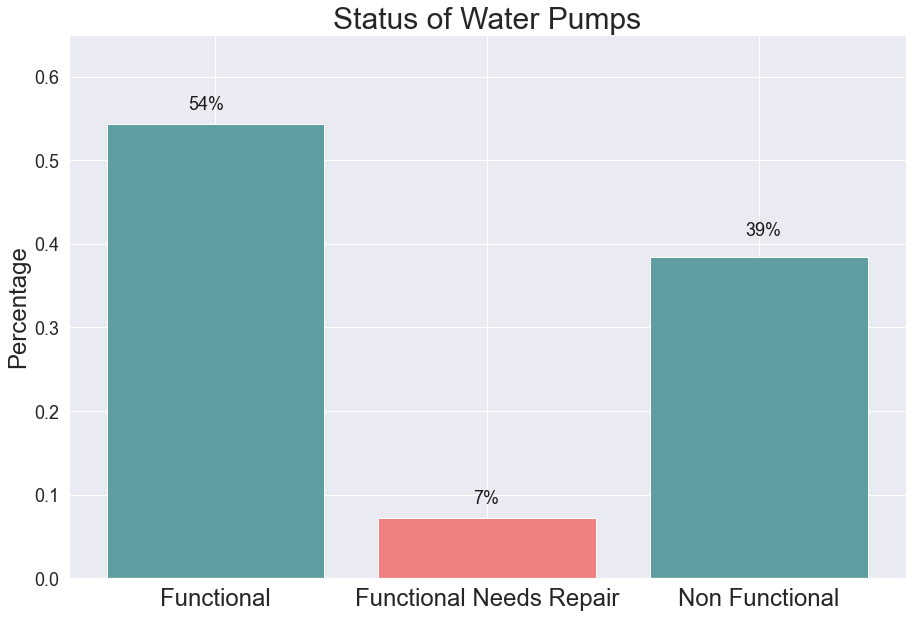

In [71]:
# Visualizing status of water pumps
fig, ax = plt.subplots(figsize = (15, 10))

x = ["Functional", "Functional Needs Repair", "Non Functional"]
height = [0.543081, 0.072677, 0.384242]
ax.tick_params(axis="x", labelsize=24)
ax.tick_params(axis="y", labelsize=18)

ax = plt.bar(x=x, 
        height=height, color = ["cadetblue", "lightcoral", "cadetblue"])
plt.title("Status of Water Pumps", fontsize=30)
plt.ylabel("Percentage", fontsize=24);
plt.ylim(0, .65)

plt.text(.95, .09, '7%', 
         fontsize = 18, color = 'k')

plt.text(1.95, .41, '39%', 
         fontsize = 18, color = 'k')
plt.text(-.1, .56, '54%', 
         fontsize = 18, color = 'k');



# Exploring Summary Statistics of Features

Understanding the summary statistics of both numerical and categorical features in the dataset is crucial for gaining insights into the characteristics and distribution of data. This step aids in comprehensively understanding the dataset and preparing it for analysis and modeling tasks related to water points or any other domain-specific dataset.

## Summary Statistics of Numerical Features

The summary statistics of numerical features provide essential information such as:
- Count: The number of non-null values for each numerical feature.
- Mean: The average value of each numerical feature, giving an indication of the central tendency.
- Standard Deviation: The measure of dispersion or spread of numerical values around the mean.
- Minimum and Maximum: The minimum and maximum values observed in each numerical feature, indicating the range of values.
- Quartiles: The values that divide the data into four equal parts, providing insights into the distribution of numerical values.

These statistics help in understanding the central tendency, dispersion, and distribution of numerical features, which is valuable for identifying outliers, assessing data quality, and selecting appropriate modeling techniques.

## Summary Statistics of Categorical Features

For categorical features, the summary statistics provide:
- Count: The number of non-null values for each categorical feature.
- Unique: The number of unique categories present in each categorical feature.
- Top: The most frequent category in each categorical feature.
- Frequency: The frequency of the top category, indicating its prevalence in the dataset.

These statistics help in understanding the distribution of categorical features, identifying dominant categories, and assessing data quality issues such as missing or inconsistent values.

## Importance to Water Point Dataset

In the context of water point datasets, summary statistics of numerical features can reveal insights into various quantitative aspects such as water quantity, quality, and infrastructure characteristics. Understanding these numerical features' summary statistics can help in identifying patterns, trends, and potential issues related to water points, aiding decision-making processes regarding water resource management, infrastructure development, and service provision.

Similarly, summary statistics of categorical features provide insights into qualitative aspects such as water point functionality, management, and usage patterns. Analyzing these statistics can help in understanding the distribution of different water point conditions, types, and management practices, which are essential for informing policies, interventions, and resource allocation strategies related to water point management and service delivery.


In [72]:
import pandas as pd

def explore_summary_statistics(data):
    # Summary statistics of numerical features
    print("Summary statistics of numerical features:")
    numerical_stats = data.describe()
    print(numerical_stats)
    print("\n")
    
    # Summary statistics of categorical features
    print("Summary statistics of categorical features:")
    categorical_stats = data.describe(include=['object'])
    print(categorical_stats)

# Example usage:
# Assuming you have a DataFrame named 'training_set_values'
# explore_summary_statistics(training_set_values)
    
explore_summary_statistics(training_set_values)


Summary statistics of numerical features:
                 id     amount_tsh    gps_height     longitude      latitude  \
count  59400.000000   59400.000000  59400.000000  59400.000000  5.940000e+04   
mean   37115.131768     317.650385    668.297239     34.077427 -5.706033e+00   
std    21453.128371    2997.574558    693.116350      6.567432  2.946019e+00   
min        0.000000       0.000000    -90.000000      0.000000 -1.164944e+01   
25%    18519.750000       0.000000      0.000000     33.090347 -8.540621e+00   
50%    37061.500000       0.000000    369.000000     34.908743 -5.021597e+00   
75%    55656.500000      20.000000   1319.250000     37.178387 -3.326156e+00   
max    74247.000000  350000.000000   2770.000000     40.345193 -2.000000e-08   

        num_private   region_code  district_code    population  \
count  59400.000000  59400.000000   59400.000000  59400.000000   
mean       0.474141     15.297003       5.629747    179.909983   
std       12.236230     17.587406      

# Data Cleaning: Handling Missing Values and Duplicates

Data cleaning is a crucial step in preparing datasets for analysis and modeling tasks. Below it explains a Python function that handles missing values and duplicates in datasets using Pandas.

### Handling Missing Values.

In [73]:
#defining missing and duplicate values

def handle_missing_and_duplicates(data):
    # Display information about missing values
    print("\nMissing Values:")
    print(data.isnull().sum())

    # Handle missing values by dropping rows with missing values
    data.dropna(inplace=True)

    # Display information about duplicates
    print("\nDuplicate Rows:", data.duplicated().sum())

    # Handle duplicates by dropping duplicate rows
    data.drop_duplicates(inplace=True)

    return data

def clean_dataframes(training_set_values, test_set_values, training_set_labels):
    
    # Clean training set values
    print("\nCleaning Training Set Values:")
    training_set_values_cleaned = handle_missing_and_duplicates(training_set_values)

    # Clean test set values
    print("\nCleaning Test Set Values:")
    test_set_values_cleaned = handle_missing_and_duplicates(test_set_values)

    # Clean training set labels
    print("\nCleaning Training Set Labels:")
    # Drop rows in training_set_labels corresponding to missing values dropped in training_set_values
    training_set_labels_cleaned = training_set_labels.loc[training_set_labels.index.isin(training_set_values_cleaned.index)]

    return training_set_values_cleaned, test_set_values_cleaned, training_set_labels_cleaned

# Clean dataframes
training_set_values, test_set_values, training_set_labels= clean_dataframes(training_set_values, test_set_values, training_set_labels)

# Print shapes of cleaned dataframes to verify
print("Shape of cleaned training_set_values:", training_set_values.shape)
print("Shape of cleaned test_set_values:", test_set_values.shape)
print("Shape of cleaned training_set_labels:", training_set_labels.shape)


Cleaning Training Set Values:

Missing Values:
id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type          

# Data Visualization
### Exploring Top 30 Funders.

Visualizing the top funders in a dataset can provide insights into the distribution and importance of funding sources. This markdown demonstrates how to find and visualize the top 30 unique funders in a dataset using Python.



In [75]:
# Find the top 30 unique funders

top_30_funders = training_set_values['funder'].value_counts().head(30)

# Print the top 30 funders
print(top_30_funders)


Government Of Tanzania     6050
Danida                     1908
World Bank                  763
Unicef                      689
Norad                       653
Private Individual          616
Germany Republi             610
District Council            537
Ministry Of Water           505
Water                       397
Rwssp                       356
World Vision                304
Hesawa                      287
Kkkt                        285
Isf                         279
Tasaf                       277
Adb                         272
Dhv                         266
Roman                       266
Ces(gmbh)                   258
Adra                        238
Rc Church                   238
Mission                     237
Oxfam                       227
Finw                        219
Dwe                         216
Rc                          193
Kiliwater                   189
Lawatefuka Water Supply     180
Magadini-makiwaru Water     175
Name: funder, dtype: int64


### Interpreting Pump Conditions by Top 10 Funders

The count plot above visualizes the number of pumps in each working condition by the top 10 funders. Here's an interpretation of the results:

- **Government Of Tanzania**: This funder appears to have the highest number of pumps across all working conditions, indicating a significant role in funding water projects and potentially having a larger infrastructure footprint.
- **Danida, Hesawa, Rwssp, World Bank, etc.**: These funders also show notable counts across different working conditions, suggesting significant contributions to water projects.

The count plot helps in understanding the distribution of pump conditions across different funders, enabling stakeholders to identify patterns, trends, and potential areas for intervention or improvement in water project management and service delivery.


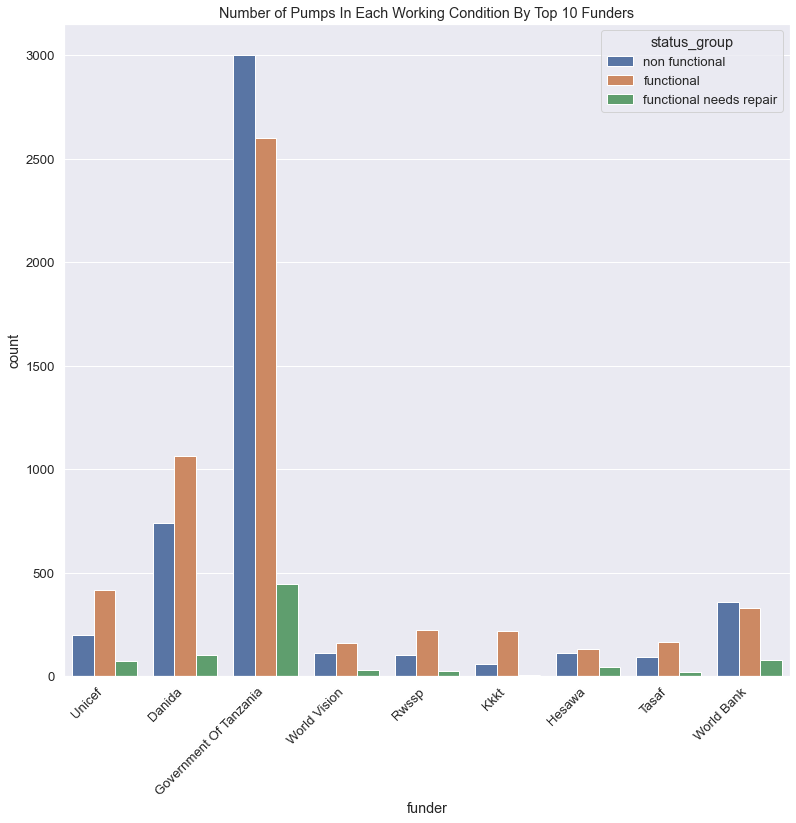

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of top 10 funders
top_funders = ['Government Of Tanzania', 'Missing', 'Danida', 'Hesawa', 'Rwssp', 'World Bank',
               'Kkkt', 'World Vision', 'Unicef', 'Tasaf']

# Merge training_set_values and training_set_labels
merged_df = pd.merge(training_set_values, training_set_labels, on="id", how="inner")


# Filter the merged DataFrame to include only the top 10 funders
merged_df_top_funders = merged_df[merged_df['funder'].isin(top_funders)]

# Plot the filtered data
plt.figure(figsize=(13, 12))
ax = sns.countplot(x='funder', hue='status_group', data=merged_df_top_funders)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.title('Number of Pumps In Each Working Condition By Top 10 Funders')
plt.show()


### Interpreting Pump Status Across Regions

The count plot above visualizes the distribution of pump status across different regions. Here's an interpretation of the results:

- **Distribution**: The plot provides insights into how pump status varies across different regions. It helps in understanding the prevalence of different pump status categories such as functional, functional needs repair, and non-functional in each region.
  
- **Regional Disparities**: Observing the distribution across regions can highlight regional disparities in pump functionality and maintenance. Some regions may have a higher proportion of non-functional pumps, indicating potential challenges in water access and infrastructure management.

- **Insights for Intervention**: Identifying regions with a higher prevalence of non-functional pumps can inform targeted interventions and resource allocation strategies. It can guide decision-makers in prioritizing regions for repair and maintenance activities to ensure sustainable access to clean water.

- **Policy Implications**: The visualization aids in formulating evidence-based policies and interventions aimed at improving water infrastructure and service delivery across different regions. It provides valuable insights for stakeholders involved in water resource management and development initiatives.

Overall, this visualization helps in understanding the spatial distribution of pump status across regions, enabling informed decision-making and targeted interventions to address water access challenges effectively.


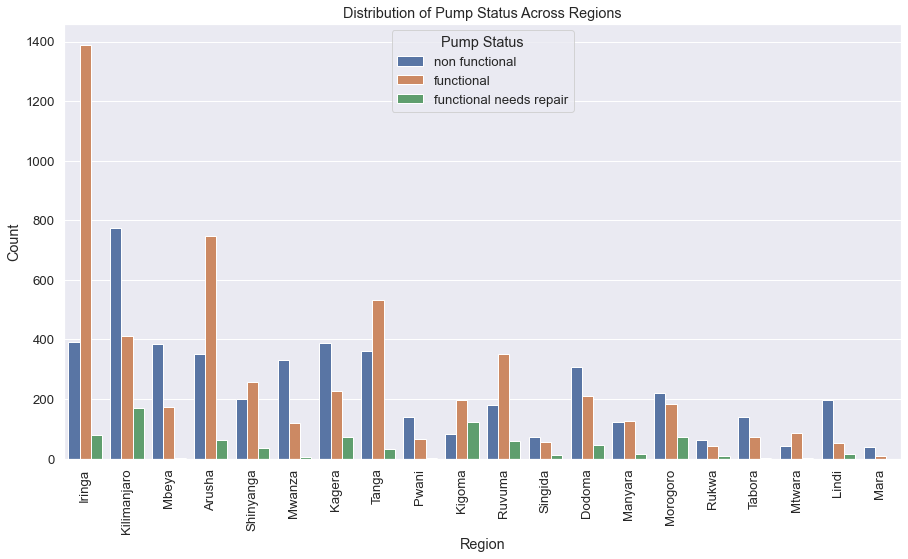

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of status categories across the 'region' feature
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='region', hue='status_group', data=merged_df_top_funders)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate the x-axis labels for better readability
plt.title('Distribution of Pump Status Across Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Pump Status')
plt.show()


### Interpreting Pump Status Across Top 10 Installers

The count plot above visualizes the distribution of pump status across the top 10 installers. Here's an interpretation of the results:

- **Distribution**: The plot provides insights into how pump status varies across different installers. It helps in understanding the prevalence of different pump status categories such as functional, functional needs repair, and non-functional among the top 10 installers.

- **Installer Performance**: Observing the distribution across installers can highlight variations in installer performance in terms of pump functionality and maintenance. Some installers may have a higher proportion of non-functional pumps, indicating potential challenges in installation quality or maintenance practices.

- **Quality Control**: Identifying installers with a higher prevalence of non-functional pumps can inform quality control measures and training initiatives to improve installation standards and maintenance practices.

- **Intervention Strategies**: The visualization aids in formulating targeted intervention strategies, such as capacity-building programs or performance incentives, to improve installer performance and ensure the reliability and sustainability of water infrastructure.

- **Stakeholder Engagement**: It provides valuable insights for stakeholders involved in water infrastructure development, including governments, NGOs, and community organizations, to collaborate with installers and implement effective measures for enhancing water service delivery.

Overall, this visualization helps in understanding the distribution of pump status across top installers, enabling stakeholders to identify areas for improvement and implement targeted interventions to ensure the functionality and reliability of water pumps.


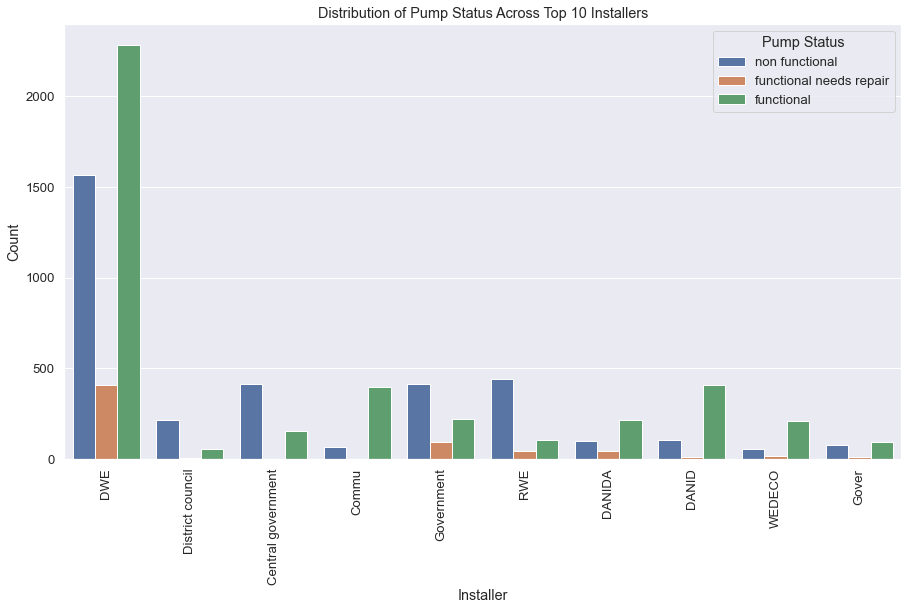

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find the top 10 installers
top_installers = merged_df_top_funders['installer'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top 10 installers
merged_df_top_installers = merged_df_top_funders[merged_df_top_funders['installer'].isin(top_installers)]

# Plot the distribution of status categories across the 'installer' feature
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='installer', hue='status_group', data=merged_df_top_installers)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate the x-axis labels for better readability
plt.title('Distribution of Pump Status Across Top 10 Installers')
plt.xlabel('Installer')
plt.ylabel('Count')
plt.legend(title='Pump Status')
plt.show()


### Interpreting Pump Status Across Basins

The count plot above visualizes the distribution of pump status across different basins. Here's an interpretation of the results:

- **Distribution**: The plot provides insights into how pump status varies across different basins. It helps in understanding the prevalence of different pump status categories such as functional, functional needs repair, and non-functional in each basin.

- **Regional Disparities**: Observing the distribution across basins can highlight regional disparities in pump functionality and maintenance. Some basins may have a higher proportion of non-functional pumps, indicating potential challenges in water access and infrastructure management.

- **Resource Allocation**: Identifying basins with a higher prevalence of non-functional pumps can inform resource allocation strategies and prioritization of interventions. It can guide decision-makers in directing resources and efforts towards regions with the greatest need for repair and maintenance activities.

- **Environmental Considerations**: Basins with a high proportion of non-functional pumps may face environmental challenges or geological factors affecting water infrastructure. Understanding these factors is essential for implementing sustainable solutions and mitigating risks to water access and quality.

- **Policy Implications**: The visualization provides valuable insights for policymakers and stakeholders involved in water resource management and development. It facilitates evidence-based decision-making and supports the design of targeted interventions to improve water infrastructure and service delivery across different basins.

Overall, this visualization helps in understanding the distribution of pump status across basins, enabling stakeholders to identify areas for intervention and prioritize resources effectively to ensure sustainable access to clean water.


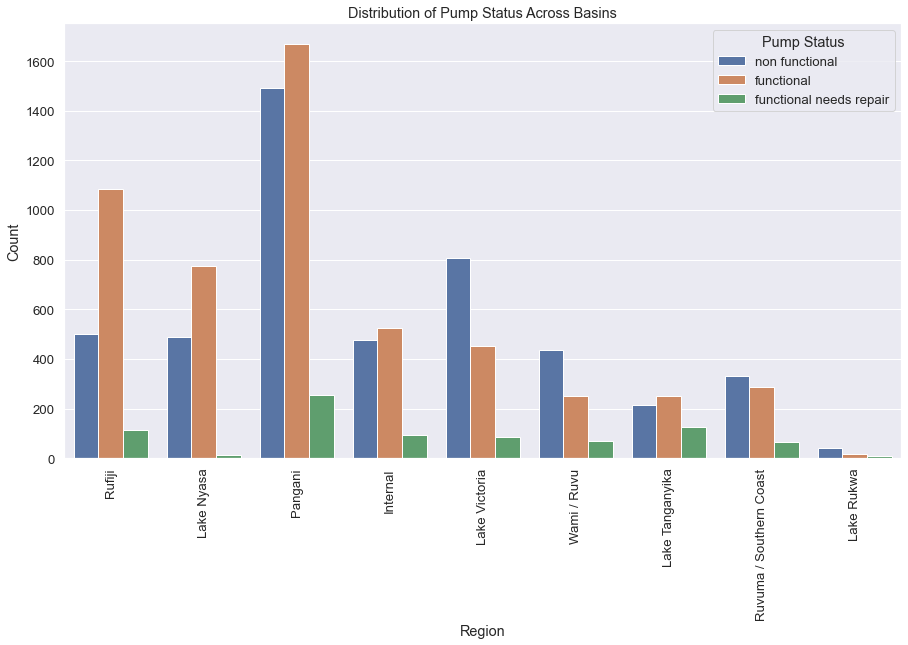

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of status categories across the 'region' feature
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='basin', hue='status_group', data=merged_df_top_funders)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate the x-axis labels for better readability
plt.title('Distribution of Pump Status Across Basins')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Pump Status')
plt.show()


### Interpreting Distribution of Pump Status on Water Quality

The count plot above visualizes the distribution of pump status across different categories of water quality. Here's an interpretation of the results:

- **Water Quality Categories**: The x-axis represents different categories of water quality, such as 'colored', 'salty', 'milky', etc. Each bar corresponds to a specific water quality category.

- **Pump Status**: The height of each segment within the bars represents the count of pumps in a particular pump status category (functional, functional needs repair, non-functional). The colors indicate different pump status categories.

- **Comparison**: The plot allows for a comparison between different water quality categories in terms of their distribution of pump statuses. For instance, it's evident whether certain water quality categories have a higher proportion of functional pumps compared to others.

- **Insights**: Observing the distribution of pump statuses across water quality categories can provide insights into the relationship between water quality and pump functionality. It may highlight patterns or correlations between specific water quality issues and pump performance.

- **Potential Implications**: Understanding how pump status varies across different water quality categories can have implications for water management strategies. It may inform decisions related to water treatment processes, infrastructure maintenance, or resource allocation to address specific water quality challenges.

Overall, this visualization helps in understanding how pump status is distributed across different categories of water quality, facilitating insights into the relationship between water quality issues and pump functionality.


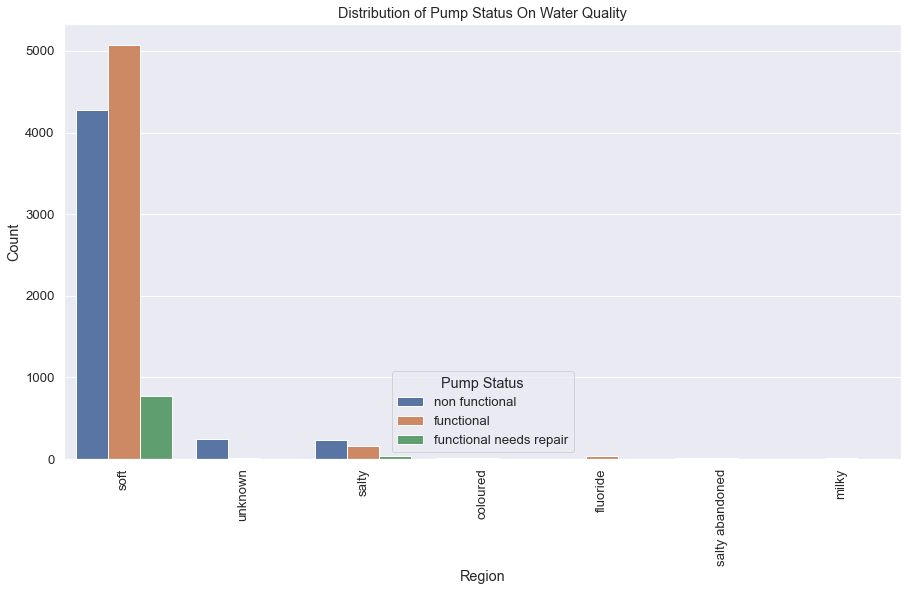

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of status categories across the 'region' feature
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='water_quality', hue='status_group', data=merged_df_top_funders)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate the x-axis labels for better readability
plt.title('Distribution of Pump Status On Water Quality')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Pump Status')
plt.show()


### Interpretating Distribution of Pump Status Across Various Extraction Types.

 Here's a breakdown of the interpretation:

- **Extraction Types**: Extraction types represent the methods employed for extracting water from wells. Each extraction type is labeled on the x-axis.

- **Count of Pumps**: The y-axis displays the count of pumps corresponding to each extraction type.

- **Plot Representation**: Each bar in the plot represents the count of pumps for a specific extraction type. The segments within each bar represent the distribution of pump status categories.

Overall, this visualization facilitates a comparative analysis of pump status across different extraction types, enabling stakeholders to make informed decisions regarding water resource management and maintenance.


The Government of Tanzania is the biggest funder of water wells in Tanzania. Most of the wells did not have information on who funded them. However, among those with funding information available, Danida, Hesawa, RWSSP, and the World Bank were the second, third, fourth, and fifth largest funders of the wells, respectively.


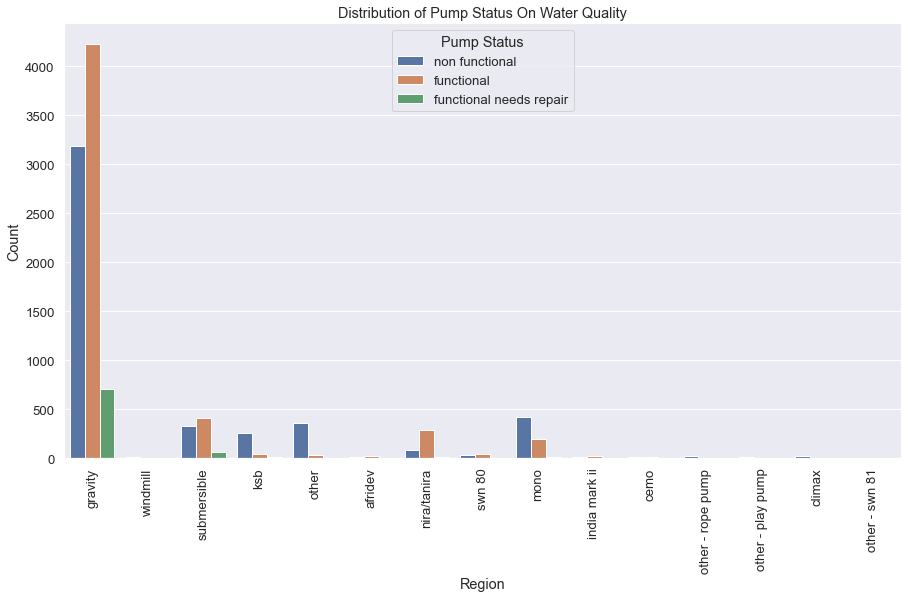

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of status categories across the 'region' feature
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='extraction_type', hue='status_group', data=merged_df_top_funders)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate the x-axis labels for better readability
plt.title('Distribution of Pump Status On Water Quality')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Pump Status')
plt.show()


### Distribution of Pump Status across different Water Point Types.

- **Water Point Types**: Water point types represent the various types of water sources, such as hand pumps, communal standpipes, or wells. Each water point type is labeled on the x-axis.

- **Count of Pumps**: The y-axis displays the count of pumps corresponding to each water point type.

- **Pump Status Categories**: Pump status categories are distinguished by different colors in the legend. These categories indicate the operational status of the pumps, such as functional, non-functional, or functional but needs repair.

- **Insights**: By examining the plot, one can discern how the distribution of pump status varies across different water point types. This insight can provide valuable information for assessing the performance and maintenance needs of different types of water sources.

Overall, this visualization aids in comparing the pump status across various water point types, enabling stakeholders to identify patterns and prioritize interventions for improving water infrastructure.


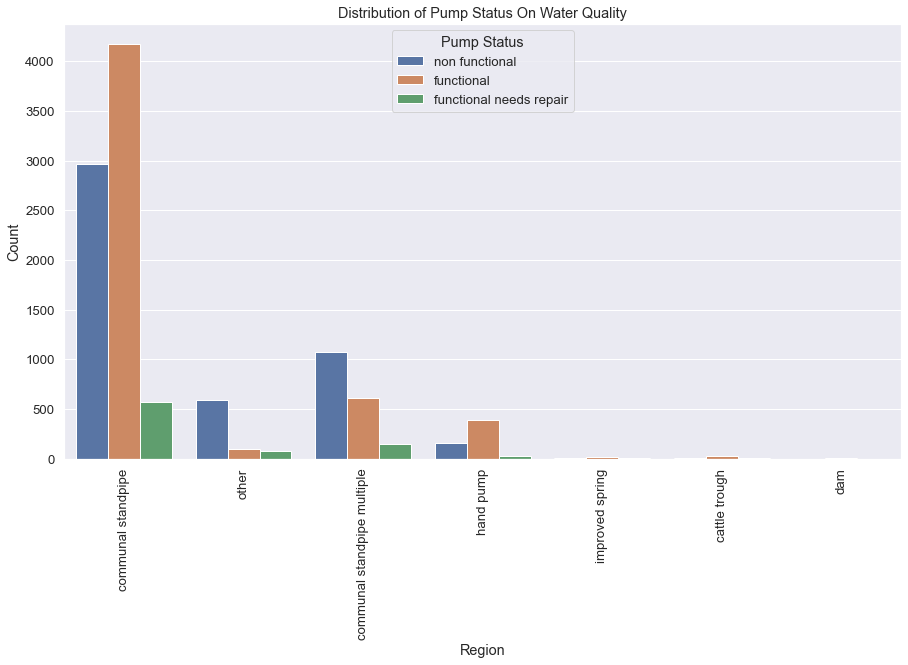

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of status categories across the 'region' feature
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='waterpoint_type', hue='status_group', data=merged_df_top_funders)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate the x-axis labels for better readability
plt.title('Distribution of Pump Status On Water Quality')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Pump Status')
plt.show()


### Analyzing Distribution of Amount in TSH Across Pump Status

This visualization presents a box plot depicting the distribution of the amount in Tanzanian Shilling (TSH) across different pump status categories. Here's an explanation of the results:

- **Box Plot**: The box plot visually represents the distribution of the amount in TSH for each pump status category. Each box represents the interquartile range (IQR) of the data, with the median indicated by a horizontal line inside the box.

- **Pump Status Categories**: Pump status categories are displayed on the x-axis. These categories indicate the operational status of the pumps, such as functional, non-functional, or functional but needs repair.

- **Amount in TSH**: The y-axis represents the amount in Tanzanian Shilling (TSH) associated with each pump status. The box plot provides insights into the variability and central tendency of the amount for different pump status categories.

- **Box Plot Elements**: 
  - The box represents the IQR, with the lower and upper hinges marking the first and third quartiles, respectively.
  - The whiskers extend from the edges of the box to the minimum and maximum values within 1.5 times the IQR from the first and third quartiles, respectively.
  - Outliers beyond the whiskers are indicated as individual data points.


This visualization facilitates understanding of how the amount in TSH varies across different pump status categories, enabling stakeholders to assess the financial implications associated with pump functionality and maintenance.


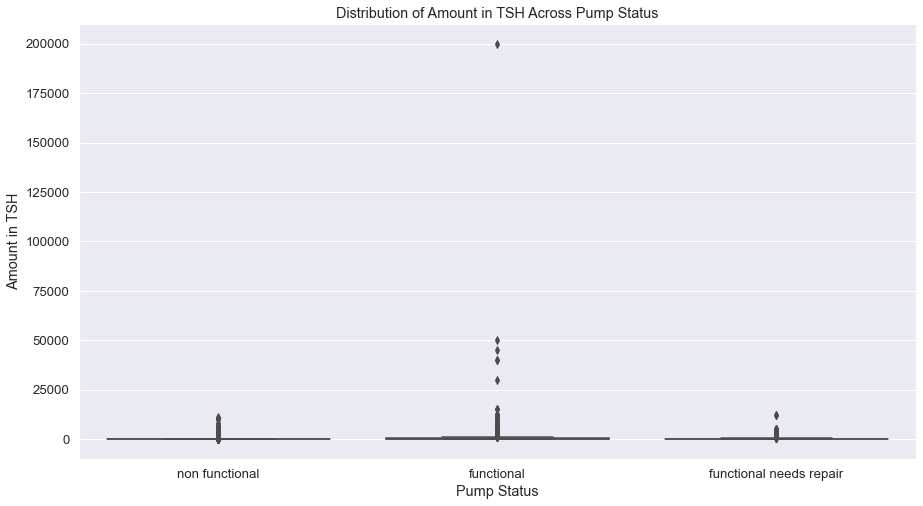

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(15, 8))

# Create a box plot
sns.boxplot(x='status_group', y='amount_tsh', data=merged_df_top_funders)

# Set the labels and title
plt.title('Distribution of Amount in TSH Across Pump Status')
plt.xlabel('Pump Status')
plt.ylabel('Amount in TSH')

# Show the plot
plt.show()


### Interpretation of Pump Status Distribution by Management

The countplot above visualizes the distribution of pump status across different management categories. Here's an interpretation of the results:

- **x-axis (Management)**: Represents different management categories associated with the waterpoints.
- **y-axis (Count)**: Indicates the count of waterpoints belonging to each management category.
- **Hue (Pump Status)**: Different colors represent the status of the pumps, categorized as functional, functional needs repair, or non-functional.

**Key Observations**:
1. **Pump Status Distribution**: Across different management categories, we observe variations in the distribution of pump statuses. This indicates that the management approach may have an influence on the functionality of waterpoints.
2. **Functional Pumps Dominance**: In several management categories, the majority of pumps are functional, indicating successful management practices leading to operational waterpoints.
3. **Non-Functional Pumps**: Some management categories exhibit a higher proportion of non-functional pumps, suggesting challenges or deficiencies in management practices in those areas.
4. **Functional Needs Repair**: In certain management categories, there's a notable presence of pumps needing repair, highlighting the importance of proactive maintenance and management strategies.

This visualization provides insights into how the management approach correlates with the functionality status of waterpoints, which can inform decision-making and resource allocation for improving waterpoint management and maintenance practices.


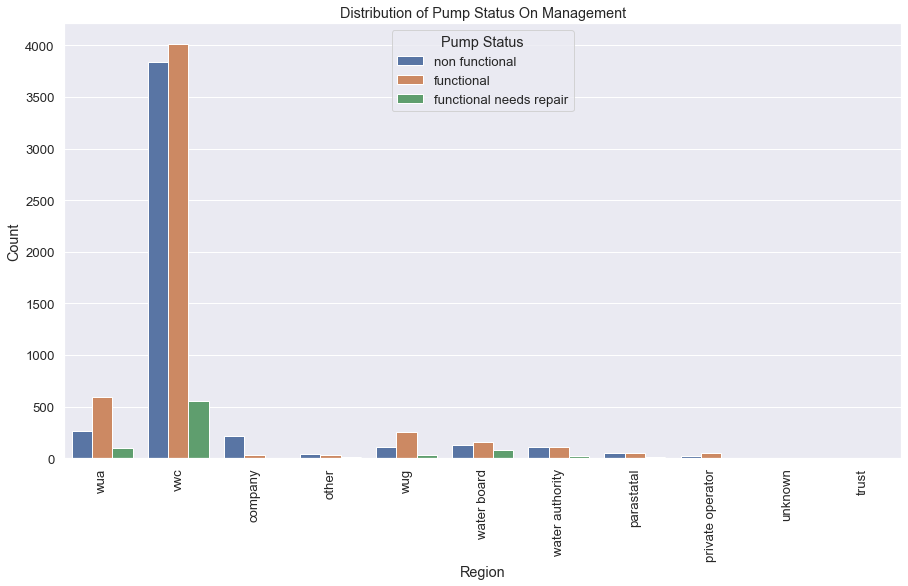

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of status categories across the 'region' feature
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='management', hue='status_group', data=merged_df_top_funders)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate the x-axis labels for better readability
plt.title('Distribution of Pump Status On Management')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Pump Status')
plt.show()


### Analyzing Pump Status Geographical Distribution

This visualization presents a scatter plot using Plotly Express, mapping the geographical distribution of pumps based on their latitude and longitude coordinates. Here's an explanation of the results:

- **Geographical Distribution**: The scatter plot displays the location of pumps on a map, with latitude and longitude coordinates defining each pump's position.

- **Pump Status Colorization**: Pump status is represented by different colors on the map. Each color corresponds to a specific pump status category, such as functional, non-functional, or functional but needs repair. The color legend provides clarity on the mapping of pump status.

- **Hover Information**: Hovering over each pump marker provides additional information, such as the pump status. This interactive feature enhances the visualization by enabling users to explore detailed data points on the map.

- **Map Layout**: The map layout is set to "open-street-map" style, providing a clean and easily interpretable backdrop for visualizing the pump distribution.

This visualization facilitates geographical analysis of pump status distribution, enabling stakeholders to identify regions with clusters of functional or non-functional pumps. It can aid in decision-making processes related to resource allocation, maintenance prioritization, and infrastructure planning.


In [86]:
import plotly.express as px

# Create a scatter plot using Plotly
fig = px.scatter_mapbox(merged_df, lat="latitude", lon="longitude", color="status_group",
                        hover_name="status_group", zoom=3)

# Update map layout
fig.update_layout(mapbox_style="open-street-map")

# Show the plot
fig.show()


### Dropping Unnecessary Columns

The following columns were identified as unnecessary for our objective and have been dropped from the dataset:

- **wpt_name**: Name of the waterpoint (not relevant for our analysis).
- **num_private**: Number of private pumps (not relevant for our analysis).
- **subvillage**: Subvillage location (not relevant for our analysis).
- **district_code**: District code (not relevant for our analysis).
- **lga**: Local government authority (not relevant for our analysis).
- **ward**: Administrative ward (not relevant for our analysis).
- **public_meeting**: Whether there was a public meeting related to the waterpoint (not relevant for our analysis).
- **recorded_by**: Entity recording the data (not relevant for our analysis).
- **scheme_name**: Name of the waterpoint scheme (not relevant for our analysis).
- **extraction_type_group**: Grouped extraction type (redundant with 'extraction_type').
- **extraction_type_class**: Classification of extraction type (redundant with 'extraction_type').
- **management_group**: Grouped management type (redundant with 'management').
- **payment_type**: Payment method (redundant with 'payment').
- **quality_group**: Grouped water quality (redundant with 'water_quality').
- **quantity_group**: Grouped water quantity (redundant with 'quantity').
- **source_type**: Source type (redundant with 'source').
- **source_class**: Source class (redundant with 'source').
- **waterpoint_type_group**: Grouped waterpoint type (redundant with 'waterpoint_type').

These columns were deemed unnecessary as they  provided redundant information and were not relevant for our analysis objectives.

### Remaining Columns

After dropping the unnecessary columns, the following columns remain in the dataset:

- **id**: Identifier for each waterpoint.
- **amount_tsh**: Amount of water available in Tanzanian Shilling.
- **date_recorded**: Date of data recording.
- **funder**: Organization or individual who funded the waterpoint.
- **gps_height**: GPS height of the waterpoint.
- **installer**: Organization or individual who installed the waterpoint.
- **longitude**: Longitude coordinate of the waterpoint location.
- **latitude**: Latitude coordinate of the waterpoint location.
- **basin**: Geographic water basin.
- **region**: Geographic region.
- **region_code**: Region code.
- **population**: Population around the waterpoint.
- **scheme_management**: Management of the waterpoint scheme.
- **permit**: Whether the waterpoint is permitted.
- **construction_year**: Year of construction of the waterpoint.
- **extraction_type**: Type of extraction used for the waterpoint.
- **management**: Management of the waterpoint.
- **payment**: Payment method for the waterpoint.
- **water_quality**: Quality of water from the waterpoint.
- **quantity**: Quantity of water from the waterpoint.
- **source**: Source of water for the waterpoint.
- **waterpoint_type**: Type of waterpoint.

These remaining columns are considered relevant for answering various questions related to waterpoint functionality, management, and quality.


In [22]:
### Dropping columns which are unnecessary.

columns_to_drop = ['wpt_name', 'num_private', 'subvillage', 'district_code', 'lga', 'ward', 
                   'public_meeting', 'recorded_by', 'scheme_name', 'extraction_type_group', 
                   'extraction_type_class', 'management_group', 'payment_type', 'quality_group', 
                   'quantity_group', 'source_type', 'source_class', 'waterpoint_type_group']

# Drop the specified columns
training_set_values.drop(columns=columns_to_drop, inplace=True)


KeyError: "['wpt_name' 'num_private' 'subvillage' 'district_code' 'lga' 'ward'\n 'public_meeting' 'recorded_by' 'scheme_name' 'extraction_type_group'\n 'extraction_type_class' 'management_group' 'payment_type' 'quality_group'\n 'quantity_group' 'source_type' 'source_class' 'waterpoint_type_group'] not found in axis"

In [23]:
#checking on the remaining collumns
remaining_columns = training_set_values.columns
print(remaining_columns)


Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'basin', 'region', 'region_code',
       'population', 'scheme_management', 'permit', 'extraction_type',
       'management', 'payment', 'water_quality', 'quantity', 'source',
       'waterpoint_type', 'age'],
      dtype='object')


## Feature Engineering

### Calculating Waterpoint Age

In this feature engineering step, we calculate the age of the waterpoint by subtracting the construction year from the current year.

In [87]:
# Calculate the age of the waterpoint
current_year = pd.Timestamp.now().year
training_set_values['age'] = current_year - training_set_values['construction_year']

# Drop the 'construction_year' column
training_set_values.drop(columns=['construction_year'], inplace=True)


### Correlation Heatmap Analysis
To understand the relationships between different features in the dataset, we visualize the correlation heatmap.
**Relevance**:
- **Correlation Analysis**: The heatmap visualizes the correlation coefficients between all pairs of numerical features in the dataset. It helps identify patterns and relationships among variables.
- **Feature Selection**: High correlations (positive or negative) between features may indicate redundancy or multicollinearity, guiding feature selection or engineering efforts. This analysis aids in building more accurate predictive models by identifying relevant features.
- **Insight Generation**: Correlation analysis provides insights into potential relationships between features, enabling better understanding of the dataset's structure and underlying patterns.


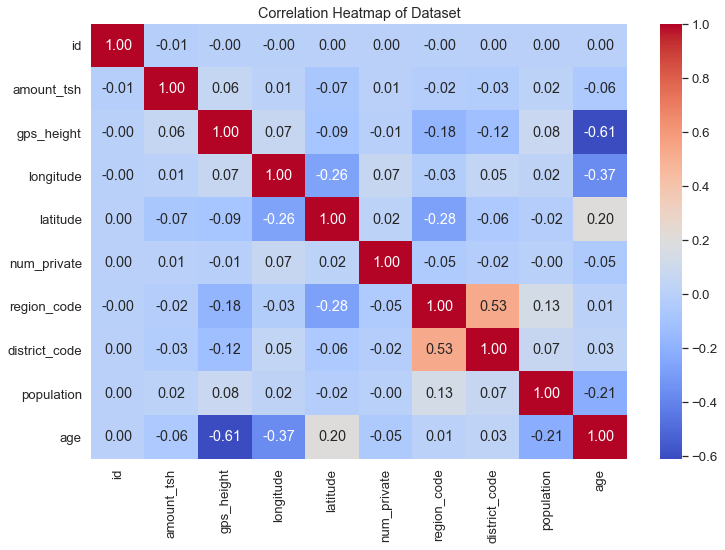

In [88]:
# Create a heatmap to check the correlation among features
plt.figure(figsize=(12, 8))
sns.heatmap(training_set_values.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Dataset')
plt.show()


### Explaining Box Plot of Numerical Features

 The resulting box plots provide insights into the distribution of each numerical feature, including central tendency, dispersion, and potential outliers.

Box plots are effective tools for visualizing the distribution of numerical data and identifying outliers, providing valuable insights into the dataset's characteristics.


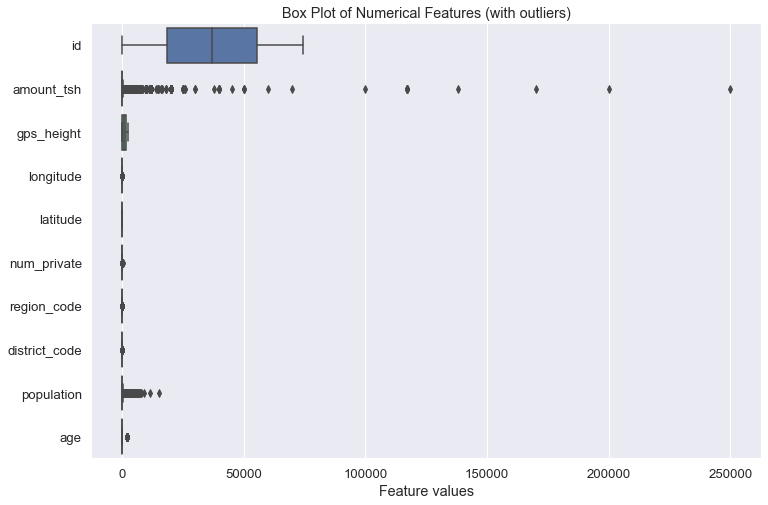

In [89]:
# Extract numerical features
numerical_features = training_set_values.select_dtypes(include=['int64', 'float64'])

# Plot box plots for numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_features, orient='h')
plt.title('Box Plot of Numerical Features (with outliers)')
plt.xlabel('Feature values')
plt.show()


### Handling Categorical Columns (e.g., funder, installer, basin, etc.):
For categorical columns, we'll encode them using one-hot encoding to convert them into a format suitable for machine learning algorithms.
In the provided code we'll use OneHotEncoder from scikit-learn to encode categorical columns into binary vectors.This will create binary columns for each category within each categorical feature.

In [90]:
# Define the list of categorical columns
categorical_columns = ['funder', 'installer', 'basin', 'region', 'scheme_management', 
                       'permit', 'extraction_type', 'management', 'payment', 
                       'water_quality', 'quantity', 'source']

# Encoding categorical columns using OneHotEncoder (as you've done before)
encoder = OneHotEncoder(sparse=True, handle_unknown='ignore')
encoded_categorical = encoder.fit_transform(training_set_values[categorical_columns])

# Get the encoded column names
encoded_column_names = []
for i, column in enumerate(encoder.categories_):
    for category in column:
        encoded_column_names.append(f"{categorical_columns[i]}_{category}")

# Convert the encoded categorical data back to a DataFrame with custom column names
encoded_categorical_df = pd.DataFrame.sparse.from_spmatrix(encoded_categorical, columns=encoded_column_names)

# Extract numerical features
numerical_features = training_set_values[['amount_tsh', 'gps_height', 'longitude', 'latitude', 
                                          'region_code', 'population']]
# Extract numerical features
numerical_features = training_set_values.select_dtypes(include=['int64', 'float64'])

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
scaled_numerical_features = scaler.fit_transform(numerical_features)

# Convert the scaled features back to a DataFrame
scaled_numerical_features_df = pd.DataFrame(scaled_numerical_features, columns=numerical_features.columns)

# Concatenate the scaled numerical features DataFrame with the encoded categorical features
training_set_values_scaled = pd.concat([encoded_categorical_df, scaled_numerical_features_df], axis=1)

# Display the concatenated DataFrame
print(training_set_values_scaled)


C:\Users\HP\anaconda3\Anaconda4\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


       funder_0  funder_A/co Germany  funder_Abasia  funder_Abd  funder_Abdul  \
0           0.0                  0.0            0.0         0.0           0.0   
1           0.0                  0.0            0.0         0.0           0.0   
2           0.0                  0.0            0.0         0.0           0.0   
3           0.0                  0.0            0.0         0.0           0.0   
4           0.0                  0.0            0.0         0.0           0.0   
...         ...                  ...            ...         ...           ...   
27808       0.0                  0.0            0.0         0.0           0.0   
27809       0.0                  0.0            0.0         0.0           0.0   
27810       0.0                  0.0            0.0         0.0           0.0   
27811       0.0                  0.0            0.0         0.0           0.0   
27812       0.0                  0.0            0.0         0.0           0.0   

       funder_Aco/germany  

### Mapping Boolean Values to Numeric

This code snippet aims to replace boolean values (`True` and `False`) with numeric equivalents (`1` and `0`, respectively) for the 'permit' column in the training dataset. Here's the explanation:

Mapping boolean values to numeric representations is often useful for tasks such as machine learning, where algorithms may require numerical inputs rather than boolean ones.


In [28]:
# Replace 'True' and 'False' with 1 and 0, respectively, for boolean columns
training_set_values['permit'] = training_set_values['permit'].map({True: 1, False: 0})

# Concatenate the 'permit' column with the other features
training_set_values_scaled['permit'] = training_set_values['permit']

print(training_set_values_scaled)


       funder_0  funder_A/co Germany  funder_Abasia  funder_Abd  funder_Abdul  \
0           0.0                  0.0            0.0         0.0           0.0   
1           0.0                  0.0            0.0         0.0           0.0   
2           0.0                  0.0            0.0         0.0           0.0   
3           0.0                  0.0            0.0         0.0           0.0   
4           0.0                  0.0            0.0         0.0           0.0   
...         ...                  ...            ...         ...           ...   
27808       0.0                  0.0            0.0         0.0           0.0   
27809       0.0                  0.0            0.0         0.0           0.0   
27810       0.0                  0.0            0.0         0.0           0.0   
27811       0.0                  0.0            0.0         0.0           0.0   
27812       0.0                  0.0            0.0         0.0           0.0   

       funder_Aco/germany  

### Dropping 'id' Column from Training Set Labels

Dropping the 'id' column is a common preprocessing step, especially since the column doesn't contribute meaningful information to the analysis or model training process. In many datasets, 'id' columns are simply unique identifiers assigned to each data entry and are not relevant to the analysis tasks at hand. Removing such columns can simplify the dataset and improve computational efficiency.


In [29]:
training_set_labels.info()

training_set_labels.drop(columns=['id'], inplace=True)

training_set_labels.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27813 entries, 0 to 59396
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            27813 non-null  int64 
 1   status_group  27813 non-null  object
dtypes: int64(1), object(1)
memory usage: 651.9+ KB


,status_group
0,functional
2,functional
5,functional
13,functional
14,functional


### Modelling: Train-Test Split

 The purpose of this step is to prepare the data for model training and evaluation.

Splitting the dataset into training and testing subsets is essential for evaluating the performance of machine learning models. The training set is used to train the model, while the testing set is used to assess its performance on unseen data. This step helps to prevent overfitting and provides a more accurate estimation of the model's generalization ability.


In [31]:
# Assuming 'X' contains your features and 'y' contains your target variable
X = training_set_values_scaled  # This should be your feature matrix after scaling
y = training_set_labels  # This should be your target variable

### Data Preprocessing: Handling Missing Values and Feature Scaling

This code snippet illustrates two essential preprocessing steps: handling missing values and scaling features. These steps are crucial for preparing the dataset before training machine learning models.

1. **Handling Missing Values with SimpleImputer**:
   - The `SimpleImputer` from the `sklearn.impute` module is used to handle missing values in the dataset.
   - In this example, missing values are replaced with the mean of the respective columns.
   
2. **Feature Scaling with StandardScaler**:
   - Feature scaling ensures that all features have the same scale, preventing certain features from dominating others during model training.
   
3. **Encoding Target Variable with LabelEncoder**:
   - For classification tasks with categorical target variables, the `LabelEncoder` from the `sklearn.preprocessing` module is used to encode class labels into numerical values.
  
These preprocessing steps are essential for improving the performance and interpretability of machine learning models. Handling missing values ensures that all data points are utilized in model training, while feature scaling helps in achieving better convergence and performance, especially for algorithms sensitive to feature magnitudes. Encoding the target variable enables the use of classification algorithms that require numerical labels.


In [32]:
# Step 1: Handle Missing Values
# Using SimpleImputer to replace missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Step 2: Scale Features
scaler = StandardScaler()
X = scaler.fit_transform(X_imputed)

from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


c:\Users\njeri\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\njeri\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\njeri\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Shape of Feature Matrix and Target Variable

This code snippet prints the shapes of the feature matrix `X` and the target variable `y`. Understanding the shape of these arrays is essential for ensuring the compatibility of data with machine learning models.

- **Shape of X**: 
  - Indicates the dimensions of the feature matrix `X`.
  - The shape is represented as `(number of samples, number of features)`.

- **Shape of y**:
  - Indicates the dimensions of the target variable `y`.
  - The shape is represented as `(number of samples,)`.

Checking the shape of `X` and `y` is crucial for verifying that the data is properly loaded and processed, and it ensures that the dimensions align correctly for model training and evaluation.


In [33]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (27813, 1882)
Shape of y: (27813,)


### Splitting Data into Training and Validation Sets

In machine learning, splitting the dataset into training and validation sets is crucial for model development and evaluation. Here's why it's important:

- **Model Training**:
  - The training set is used to train the machine learning model by fitting it to the training data. This involves learning the underlying patterns and relationships between features and target labels.

- **Model Evaluation**:
  - The validation set is used to evaluate the performance of the trained model. By assessing the model's performance on unseen data (validation set), we can estimate how well the model generalizes to new, unseen examples.

- **Preventing Overfitting**:
  - Splitting the data helps in detecting and preventing overfitting, where the model learns to memorize the training data rather than capturing underlying patterns. By evaluating the model on a separate validation set, we can detect overfitting and fine-tune model hyperparameters to improve generalization.

- **Hyperparameter Tuning**:
  - The validation set is also used for hyperparameter tuning, such as optimizing regularization parameters or adjusting the model complexity. This process helps improve the model's performance and generalization ability.

- **Assessing Performance**:
  - Splitting the data allows us to assess the model's performance metrics, such as accuracy, precision, recall, or F1-score, on the validation set. These metrics provide insights into how well the model performs on different aspects of classification or regression tasks.

By splitting the dataset into training and validation sets, we ensure that the machine learning model is trained effectively, evaluated accurately, and optimized for better performance and generalization on unseen data.


In [34]:
# Split the data into training and validation sets with an 80/20 ratio
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train and y_train contain the training features and target labels, respectively,
# while X_val and y_val contain the validation features and target labels, respectively.

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)


Shape of X_train: (22250, 1882)
Shape of X_val: (5563, 1882)
Shape of y_train: (22250,)
Shape of y_val: (5563,)


### First Model: Logistic Regression Model

### Interpretation of Results

- **Accuracy**: The overall accuracy of the model is 0.765, indicating that it correctly predicts the class labels for approximately 76.5% of the instances in the validation set.

- **Classification Report**:
  - **Precision**: 
    - Class 0: Precision of 0.78 means that among instances predicted as class 0, 78% are actually class 0.
    - Class 1: Precision of 0.37 suggests a lower precision for class 1 predictions.
    - Class 2: Precision of 0.78 indicates a relatively high precision for class 2 predictions.
  - **Recall**:
    - Class 0: Recall of 0.88 implies that 88% of actual class 0 instances were correctly classified.
    - Class 1: Recall of 0.18 indicates a lower recall for class 1 predictions.
    - Class 2: Recall of 0.69 suggests a moderate recall for class 2 predictions.
  - **F1-score**:
    - F1-score is the harmonic mean of precision and recall, providing a balanced metric.
    - Class 0: F1-score of 0.83 indicates a good balance between precision and recall.
    - Class 1: F1-score of 0.25 reflects a lower harmonic mean due to lower precision and recall.
    - Class 2: F1-score of 0.73 suggests a relatively balanced performance for class 2 predictions.
  - **Support**:
    - The support refers to the number of instances of each class in the validation set.

- **Confusion Matrix**:
  - The confusion matrix provides a detailed breakdown of the model's predictions.
  - It indicates the number of true positive, true negative, false positive, and false negative predictions for each class.
  - For example, [2836   87  286] in row 1 suggests that for class 0, 2836 instances were correctly predicted, 87 instances were falsely classified as class 1, and 286 instances were falsely classified as class 2.

- **Convergence Warning**:
  - The warning indicates that the logistic regression model failed to converge, which may affect its performance.
  - It suggests increasing the maximum number of iterations or scaling the data to address the issue.

Overall, these results provide insights into the performance of the model across different classes and highlight areas for potential improvement.

Interpreting these results helps in understanding the performance of the logistic regression model and identifying areas for improvement or further optimization.


In [35]:
# Assuming X_train, y_train, and X_val have been properly preprocessed to handle missing values and other issues

# Initialize logistic regression model
logistic_regression_model = LogisticRegression(random_state=42)

# Train the model on the training data
logistic_regression_model.fit(X_train, y_train)

# Predict the labels for validation set
y_pred = logistic_regression_model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Calculate and print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred))

# Calculate and print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))


Accuracy: 0.765234585655222
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      3209
           1       0.37      0.18      0.25       411
           2       0.78      0.69      0.73      1943

    accuracy                           0.77      5563
   macro avg       0.64      0.59      0.60      5563
weighted avg       0.75      0.77      0.75      5563

Confusion Matrix:
[[2836   87  286]
 [ 237   76   98]
 [ 554   44 1345]]


c:\Users\njeri\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Interpretation of Results

- **Confusion Matrix**:
  - The confusion matrix provides a visual representation of the model's performance by comparing predicted labels with true labels.
  - It consists of a grid where each row represents the true class, and each column represents the predicted class.
  - The values in the cells of the matrix indicate the number of instances that fall into each combination of true and predicted classes.

- **Heatmap Visualization**:
  - The heatmap visualizes the confusion matrix using color gradients to highlight different levels of performance.
  - Darker shades represent higher values, indicating more instances classified into a particular combination of true and predicted classes.
  - Lighter shades indicate lower values, suggesting fewer instances in those combinations.
  - Annotated values within each cell provide the actual counts of instances for each combination.

- **Interpretation**:
  - By examining the confusion matrix, you can assess the model's performance across different classes.
  - It allows you to identify which classes the model performs well on and which ones it struggles with.
  - For instance, diagonal elements with higher values indicate correct predictions, while off-diagonal elements suggest misclassifications.
  - Overall, the heatmap provides valuable insights into the strengths and weaknesses of the model's predictions.


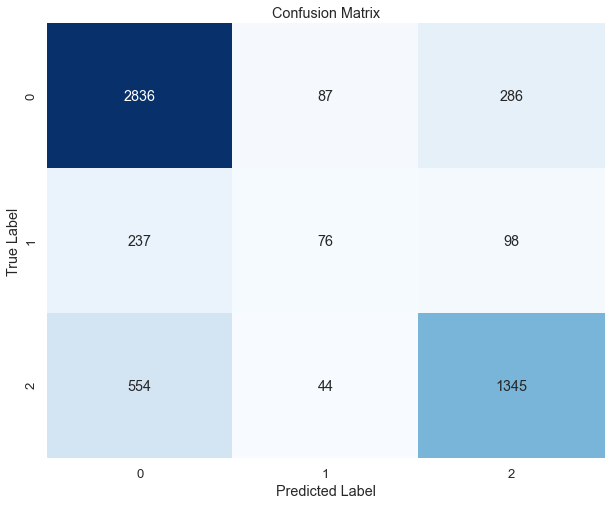

In [36]:

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Get class labels
class_labels = sorted(np.unique(y_val))

# Set seaborn style
sns.set(font_scale=1.2)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Explanation of the Code

- **SMOTE (Synthetic Minority Over-sampling Technique)**:
    - Class imbalance occurs when one class has significantly fewer instances than another class, which can lead to biased models.
  - SMOTE works by generating synthetic samples for the minority class to balance the class distribution in the dataset.

- **Resampling Training Data**:
  - This resampling technique helps alleviate the class imbalance issue by increasing the representation of the minority class in the training data.

- **Training Logistic Regression Model**:
  - By training on the resampled data, the model learns from a more balanced dataset, which can improve its ability to generalize to unseen data and make accurate predictions.

### Importance:
- **Addressing Class Imbalance**:
  - Class imbalance is a common problem in machine learning, especially in scenarios where one class is rare compared to others.
  - By using SMOTE to oversample the minority class, we ensure that the model is exposed to sufficient examples of the minority class during training, improving its ability to recognize and classify such instances accurately.
- **Enhancing Model Performance**:
  - Resampling techniques like SMOTE can lead to better model performance, especially in situations where class imbalance negatively impacts the model's ability to learn from the data.
  - Training the logistic regression model on the resampled data allows it to capture the underlying patterns more effectively, leading to more reliable predictions on unseen data.


In [37]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only (to avoid data leakage)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize logistic regression model
logistic_regression_model = LogisticRegression(random_state=42)

# Train your model on the resampled data
logistic_regression_model.fit(X_train_resampled, y_train_resampled)


c:\Users\njeri\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

### Explanation of the Code

- **Confusion Matrix Visualization**:
  - The confusion matrix provides insight into the performance of the model by showing the count of true positive, true negative, false positive, and false negative predictions for each class.

### Importance:
- **Assessing Model Performance**:
  - The confusion matrix visualization allows us to evaluate how well the logistic regression model performs on the validation data after being trained on resampled data.
  - It provides valuable information about the model's ability to correctly classify instances belonging to different classes and identify any potential misclassifications.


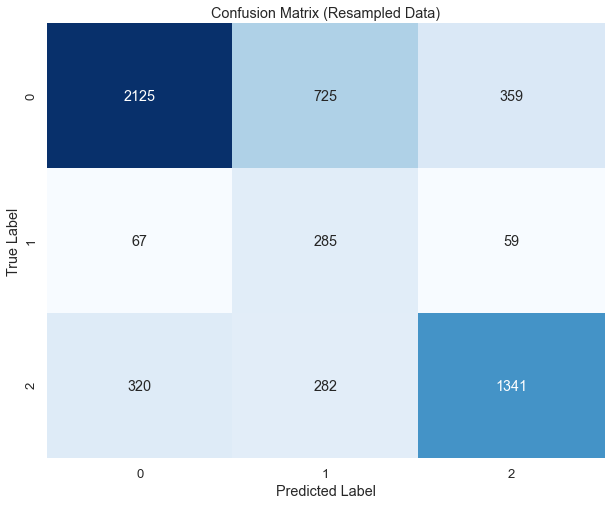

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Calculate predictions using the logistic regression model trained on the resampled data
y_pred_resampled = logistic_regression_model.predict(X_val)

# Calculate the confusion matrix using the resampled predictions and true labels
conf_matrix_resampled = confusion_matrix(y_val, y_pred_resampled)

# Get class labels
class_labels_resampled = sorted(np.unique(y_val))

# Set seaborn style
sns.set(font_scale=1.2)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_resampled, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=class_labels_resampled, yticklabels=class_labels_resampled)
plt.title('Confusion Matrix (Resampled Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### This code initializes, trains, and evaluates a Decision Tree classification model:

- The best parameters for the model are determined through a grid search, with the following results:
  - Max Depth: None
  - Min Samples Split: 20
  - Min Samples Leaf: 1
  
- The best accuracy achieved by the model is 76.81%.

This process helps in understanding the optimal configuration of the Decision Tree model and its performance on the dataset.


In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define your hyperparameters ranges
max_depth_values = [None, 10, 20, 30]
min_samples_split_values = [2, 10, 20]
min_samples_leaf_values = [1, 5, 10]

# Store the best parameters and their corresponding accuracy
best_params = {}
best_accuracy = 0

# Iterate over all possible combinations of hyperparameters
for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        for min_samples_leaf in min_samples_leaf_values:
            # Initialize and train the model with the current set of hyperparameters
            dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
            dt.fit(X_train, y_train)
            
            # Predict and evaluate the model
            y_pred = dt.predict(X_val)
            accuracy = accuracy_score(y_val, y_pred)
            
            # If the current model's accuracy is better than the previous best, update the best parameters and accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf
                }

# Print the best parameters and their corresponding accuracy
print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy}")


Best Parameters: {'max_depth': None, 'min_samples_split': 20, 'min_samples_leaf': 1}
Best Accuracy: 0.7681107316196297


This code initializes, trains, and evaluates a K-nearest neighbors (KNN) classification model:

 **Evaluate the Model**: 
   - A classification report is generated using `classification_report(y_val, y_pred_knn)`.
   - The classification report provides metrics such as precision, recall, F1-score, and support for each class, offering insights into the model's performance.

This process helps assess the effectiveness of the KNN model in classifying the data.


In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Train the KNN model on the resampled data
knn_model.fit(X_train_resampled, y_train_resampled)

# Predict the labels for validation data
y_pred_knn = knn_model.predict(X_val)

# Evaluate the model
print("Classification Report for KNN Model:")
print(classification_report(y_val, y_pred_knn))


Classification Report for KNN Model:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78      3209
           1       0.28      0.55      0.37       411
           2       0.74      0.74      0.74      1943

    accuracy                           0.72      5563
   macro avg       0.62      0.67      0.63      5563
weighted avg       0.76      0.72      0.74      5563



The confusion matrix heatmap visualizes the performance of the K-nearest neighbors (KNN) model in classifying the data. Each cell in the heatmap represents the count of data points that fall into a specific combination of true and predicted labels.

- **True Label (Rows)**: The rows of the heatmap represent the true labels of the data points.
- **Predicted Label (Columns)**: The columns represent the predicted labels by the KNN model.
- **Diagonal Cells**: These cells represent the instances where the true label matches the predicted label. Higher values along the diagonal indicate accurate predictions.
- **Off-diagonal Cells**: These cells represent instances of misclassification. The values in these cells indicate how many data points were incorrectly classified.
- **Color Gradient**: The color intensity of the cells indicates the count of data points. Darker shades typically represent higher counts.

By examining the confusion matrix heatmap, we can assess the KNN model's performance across different classes. We can identify which classes are more accurately predicted and which ones have higher misclassification rates. This information helps in understanding the strengths and weaknesses of the model and can guide further improvements or adjustments to the model parameters.


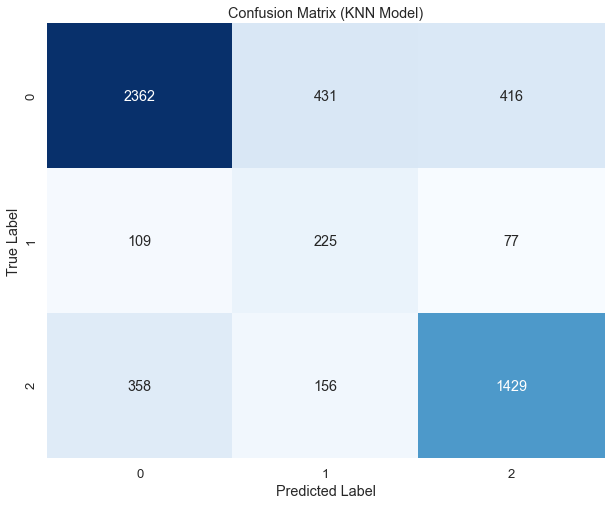

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Calculate the confusion matrix for the KNN model
conf_matrix_knn = confusion_matrix(y_val, y_pred_knn)

# Get class labels
class_labels_knn = sorted(np.unique(y_val))

# Set seaborn style
sns.set(font_scale=1.2)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_knn, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=class_labels_knn, yticklabels=class_labels_knn)
plt.title('Confusion Matrix (KNN Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


The output of the evaluation metrics provides insights into the performance of the K-nearest neighbors (KNN) model:

- **Accuracy**: The accuracy score indicates the proportion of correctly classified instances among all instances. In this case, the KNN model achieved an accuracy of approximately 72.19%, which suggests that about 72.19% of the predictions made by the model were correct.

- **Precision**: Precision measures the ability of the classifier not to label a negative sample as positive. It is the ratio of true positive predictions to the total number of instances predicted as positive. The weighted average precision score here is approximately 76.18%, indicating that, on average, 76.18% of the instances predicted as positive were indeed positive.

- **Recall**: Recall, also known as sensitivity, measures the ability of the classifier to find all positive instances. It is the ratio of true positive predictions to the total number of actual positive instances. The weighted average recall score is approximately 72.19%, suggesting that the model correctly identified about 72.19% of the actual positive instances.

- **F1-score**: The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. It is a single metric that combines both precision and recall. The weighted average F1-score is approximately 73.68%, indicating a balanced performance between precision and recall.


In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred_knn)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y_val, y_pred_knn, average='weighted')
recall = recall_score(y_val, y_pred_knn, average='weighted')
f1 = f1_score(y_val, y_pred_knn, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.7219126370663311
Precision: 0.7617778198876071
Recall: 0.7219126370663311
F1-score: 0.7367684088922453


The output of the GridSearchCV process reveals the best parameters and the corresponding accuracy score achieved by the K-nearest neighbors (KNN) classifier:

- **Best Parameters**: The best combination of hyperparameters found by the grid search consists of using a Manhattan distance metric (`metric='manhattan'`), considering 3 nearest neighbors (`n_neighbors=3`), and applying distance-based weights for predictions (`weights='distance'`).

- **Best Score (Accuracy)**: The accuracy score associated with the best parameters is approximately 83.67%. This indicates that the KNN classifier achieved an accuracy of around 83.67% on the training data when using the optimal combination of hyperparameters identified by the grid search.


In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

# Define a smaller parameter grid
param_grid = {
    'n_neighbors': [3, 5],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting method for predictions
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

# Initialize GridSearchCV with the KNN classifier and smaller parameter grid
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Predict the labels for test set
y_pred_test = grid_search.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

print("Best Parameters:", best_params)
print("Best Score (Accuracy):", best_score)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Score (Accuracy): 0.8367280964743683


The output of the GridSearchCV process for the Random Forest classifier reveals the following results:

- **Best Parameters**: The best combination of hyperparameters found by the grid search includes:
  - `max_depth`: None
  - `max_features`: 'auto'
  - `min_samples_leaf`: 1
  - `min_samples_split`: 2
  - `n_estimators`: 200
  These parameters indicate that the best-performing Random Forest model was built with 200 estimators (trees), no limit on the maximum depth of each tree (`max_depth=None`), and other settings for controlling node splitting and leaf conditions.

- **Best Score (Accuracy)**: The accuracy score associated with the best parameters is approximately 87.95%. This indicates that the Random Forest classifier achieved an accuracy of around 87.95% on the training data when using the optimal combination of hyperparameters identified by the grid search.

- **Accuracy**: The accuracy achieved by the Random Forest model on the test set is approximately 88.62%. This suggests that the model generalized well to unseen data.

- **Confusion Matrix**: The confusion matrix provides a detailed breakdown of the model's performance across different classes. It shows the number of true positives, true negatives, false positives, and false negatives for each class. In this case, the confusion matrix reveals that the model correctly classified a majority of instances across all classes, with some misclassifications.


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Define a smaller parameter grid
param_grid = {
    'n_estimators': [100, 200],  # Reducing the number of trees in the forest
    'max_depth': [None, 10],  # Reducing the maximum depth of each tree
    'min_samples_split': [2, 5],  # Reducing the minimum number of samples required to split a node
    'min_samples_leaf': [1, 2],  # Reducing the minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt']  # Reducing the number of features to consider when looking for the best split
}

# Initialize Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with the Random Forest classifier and smaller parameter grid
grid_search_rf = GridSearchCV(estimator=random_forest_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

# Predict the labels for test set using the best estimator from GridSearchCV
y_pred_rf = grid_search_rf.predict(X_test)

# Compute confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Best Parameters:", best_params_rf)
print("Best Score (Accuracy):", best_score_rf)
print("Accuracy:", accuracy_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)


Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score (Accuracy): 0.8795083459369598
Accuracy: 0.8862368660007783
Confusion Matrix:
[[2231  191  223]
 [  91 2386   45]
 [ 234   93 2215]]


The output of the evaluation metrics for the Random Forest classifier on the test set is as follows:

- **Accuracy**: The accuracy of the model is approximately 88.62%. This indicates the proportion of correctly classified instances out of all instances in the test set.

- **Precision**: The precision of the model is approximately 88.60%. Precision measures the proportion of true positive predictions out of all positive predictions made by the model. It provides insight into the model's ability to avoid false positives.

- **Recall**: The recall of the model is approximately 88.62%. Recall, also known as sensitivity, measures the proportion of true positive predictions out of all actual positive instances in the test set. It indicates the model's ability to capture all positive instances.

- **F1-score**: The F1-score of the model is approximately 88.57%. The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is particularly useful when the class distribution is imbalanced.

- **Confusion Matrix**: The confusion matrix provides a detailed breakdown of the model's predictions across different classes. It shows the number of true positives, true negatives, false positives, and false negatives for each class. In this case, the confusion matrix reveals that the model correctly classified a majority of instances across all classes, with some misclassifications.


In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred_rf, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred_rf, average='weighted')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_rf, average='weighted')
print("F1-score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8862368660007783
Precision: 0.8859849148818455
Recall: 0.8862368660007783
F1-score: 0.8857400673260084
Confusion Matrix:
[[2231  191  223]
 [  91 2386   45]
 [ 234   93 2215]]


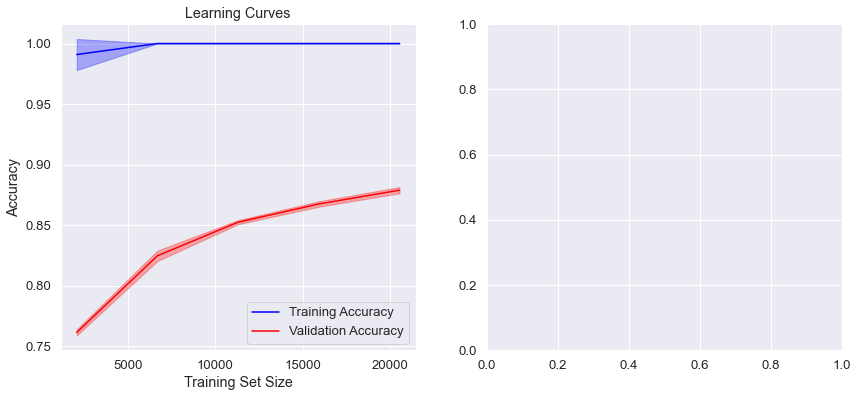

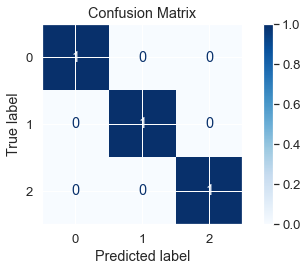

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import learning_curve  # Import the learning_curve function

def plot_learning_curves(estimator, X, y, train_sizes, cv):
    # Generate learning curves
    train_sizes_abs, train_scores, val_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring='accuracy', n_jobs=-1)

    # Calculate mean and standard deviation of training and validation scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Plot learning curves
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(train_sizes_abs, train_mean, label='Training Accuracy', color='blue')
    plt.fill_between(train_sizes_abs, train_mean - train_std, train_mean + train_std, alpha=0.3, color='blue')
    plt.plot(train_sizes_abs, val_mean, label='Validation Accuracy', color='red')
    plt.fill_between(train_sizes_abs, val_mean - val_std, val_mean + val_std, alpha=0.3, color='red')
    plt.title('Learning Curves')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Check if the estimator is fitted before plotting the confusion matrix
    if hasattr(estimator, 'predict'):
        plt.subplot(1, 2, 2)
        # Fit the estimator before plotting the confusion matrix
        estimator.fit(X, y)
        plot_confusion_matrix(estimator.best_estimator_, X, y, cmap=plt.cm.Blues, normalize='true')
        plt.title('Confusion Matrix')

    plt.tight_layout()
    plt.show()

# Example usage
plot_learning_curves(grid_search_rf, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=3)


The output of the GridSearchCV for the XGBoost classifier on the test set is as follows:

- **Best Parameters (XGBoost)**: The best hyperparameters found by the GridSearchCV are {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}. These parameters represent the combination that resulted in the highest cross-validated accuracy during the grid search.

- **Best Score (Accuracy) (XGBoost)**: The best cross-validated accuracy achieved by the XGBoost classifier using the best parameters is approximately 82.73%. This score indicates the average accuracy of the model across different folds during cross-validation.

- **Accuracy (XGBoost)**: The accuracy of the XGBoost classifier on the test set using the best estimator from the GridSearchCV is approximately 82.79%. This represents the proportion of correctly classified instances out of all instances in the test set.

- **Confusion Matrix (XGBoost)**: The confusion matrix provides a detailed breakdown of the model's predictions across different classes. It shows the number of true positives, true negatives, false positives, and false negatives for each class. In this case, the confusion matrix reveals that the model correctly classified a majority of instances across all classes, with some misclassifications.


In [47]:
from xgboost import XGBClassifier

# Define a parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Initialize GridSearchCV with XGBoost classifier and parameter grid
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, cv=3, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

# Predict the labels for test set using the best estimator from GridSearchCV
y_pred_xgb = grid_search_xgb.predict(X_test)

# Compute confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print("Best Parameters (XGBoost):", best_params_xgb)
print("Best Score (Accuracy) (XGBoost):", best_score_xgb)
print("Accuracy (XGBoost):", accuracy_xgb)
print("Confusion Matrix (XGBoost):")
print(conf_matrix_xgb)


Best Parameters (XGBoost): {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best Score (Accuracy) (XGBoost): 0.8273221149523069
Accuracy (XGBoost): 0.8278635361266052
Confusion Matrix (XGBoost):
[[2199  223  223]
 [ 177 2254   91]
 [ 389  224 1929]]


### Saving our best model as a pickle file

In [50]:
import joblib

# Save the GridSearchCV object to a pickle file
joblib.dump(grid_search_rf, 'random_forest_model.pkl')


['random_forest_model.pkl']

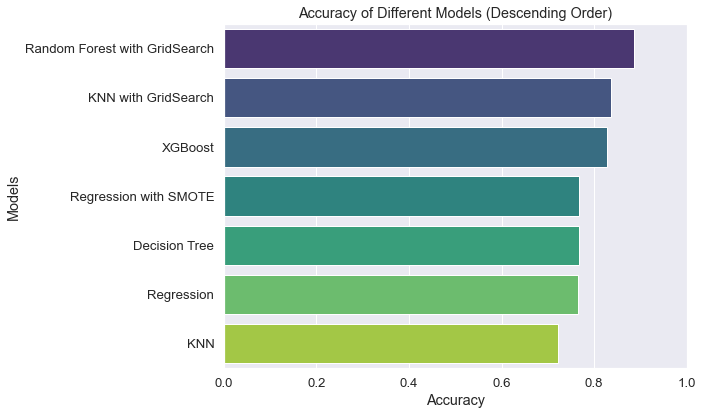

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the models and their accuracies
models = ['Regression', 'Regression with SMOTE', 'Decision Tree', 'KNN', 'KNN with GridSearch', 'Random Forest with GridSearch', 'XGBoost']
accuracies = [0.765234585655222, 0.7681107316196297, 0.7681107316196297, 0.7219, 0.8367280964743683, 0.8862368660007783, 0.8278635361266052]

# Sort the models and accuracies in descending order of accuracy
sorted_indices = sorted(range(len(accuracies)), key=lambda i: accuracies[i], reverse=True)
sorted_models = [models[i] for i in sorted_indices]
sorted_accuracies = [accuracies[i] for i in sorted_indices]

# Create the plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_accuracies, y=sorted_models, palette='viridis')
plt.title('Accuracy of Different Models (Descending Order)')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.xlim(0, 1)  # Set x-axis limits from 0 to 1
plt.tight_layout()

# Show plot
plt.show()
